## Title - Servo Prediction using Regression Model

A Servo Prediction model is like a smart controller for mechanical devices, such as motors or actuators. Its job is to keep track of where the device is and move it precisely where it needs to be. Think of it as a system that constantly checks the position and makes tiny adjustments to keep things running smoothly.





## Objective

Objective of Servo prediction model is to predict Class of a vehicle based on its Motor, Screw, Pgain & Vgain.

## Data Source

Dataset from the YBI Foundation, which is available on GitHub.

Attributes in the dataset are -
  1. Motor
  2. Screw
  3. Pgain
  4. Vgain
  5. Class

## Imort Library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [32]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv")

In [33]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


## Describe Data

In [34]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [36]:
df.nunique()

Motor     5
Screw     5
Pgain     4
Vgain     5
Class    51
dtype: int64

In [37]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

## Data Visualization

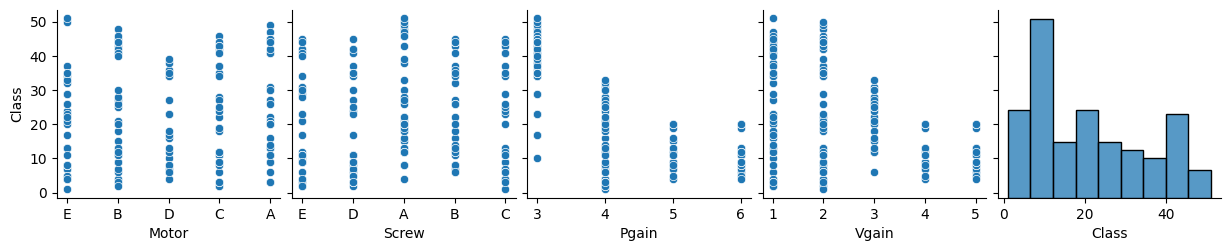

In [38]:
sns.pairplot(df, x_vars = ['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], y_vars = ['Class'])

<Axes: xlabel='Pgain', ylabel='Class'>

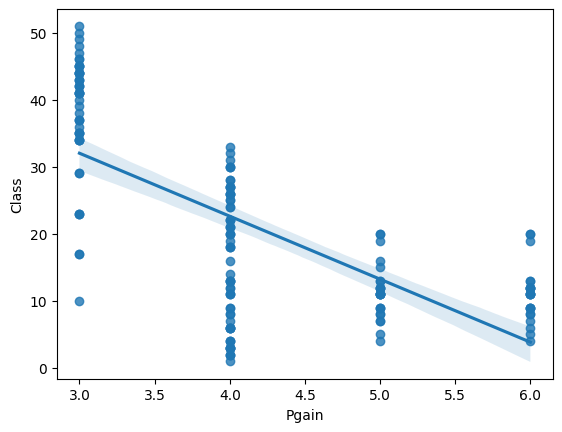

In [39]:
sns.regplot(x = 'Pgain' , y = 'Class' , data = df)

## Data Preprocessing

Remove Missing Values

In [40]:
df = df.dropna()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Encoding of Categorical Features

In [42]:
df.replace({'Motor' : {'A' : 0 , 'B' :1, 'C' : 2, 'D' : 3, 'E': 4}}, inplace = True)

In [43]:
df.replace({'Screw' : {'A' : 0 , 'B' :1, 'C' : 2, 'D' : 3, 'E': 4}}, inplace = True)

## Define Target variable (y) & Feature variable (x)

In [44]:
y = df['Class']
y.shape

(167,)

In [46]:
x = df[['Motor', 'Screw', 'Pgain', 'Vgain']]
x.shape

(167, 4)

In [47]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train , y_test = train_test_split(x, y, train_size = 0.7 , random_state = 2529)

In [50]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

## Modelling

Linear Regression Model

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [52]:
lr.fit(x_train, y_train)

LinearRegression()

In [53]:
lr.intercept_

79.29807295805837

In [54]:
lr.coef_

array([ -2.04322378,  -2.98953597, -14.59161593,   4.5836332 ])

## Prediction


In [55]:
y_pred = lr.predict(x_test)

In [56]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## Model Evaluation

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error

In [58]:
mean_squared_error(y_test, y_pred)

66.03589175595563

In [59]:
mean_absolute_error(y_test, y_pred)

7.190539677251235

In [60]:
mean_absolute_percentage_error(y_test, y_pred)

0.8268204638174629

## Explaination

The Servo Prediction model is like a smart system that ensures mechanical devices, such as motors or actuators, move exactly how we want them to. It achieves this by constantly getting feedback and adjusting to maintain the desired position or path.

In Python, there are handy tools like TensorFlow, Keras, PyTorch, and scikit-learn to help build these prediction models. They provide functions to prepare data, teach the model, and see how well it's doing.

Building a precise servo prediction model usually means going through a few rounds of trial and error. First, you gather data that shows how the mechanical system behaves. Then, you use this data to teach the model, helping it understand the patterns and movements. After that, you check how well the model works and see where it needs improvement. By repeating this process, you can make the model better at predicting and controlling the device's motion.
